In [107]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import category_encoders as ce
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report,f1_score

In [3]:
df=  pd.read_csv('Voices_Cleaned.csv', index_col=0)

In [4]:
df.head()

,mean,std,median,first_q,third_q,inter_q,skewness,kurtosis,mode,peak,date,user,age,pronounce,sex
0,106.196970,81.568782,100.0,20.0,190.0,170.0,0.243448,-1.368536,10.0,270.0,20100710,1028,Adult,American,0
1,93.255452,91.364379,50.0,20.0,200.0,180.0,0.734991,-1.222807,50.0,270.0,20170321,1337ad,Adult,Unknown,1
2,105.632959,92.503697,50.0,20.0,200.0,180.0,0.451782,-1.562513,50.0,270.0,20170321,1337ad,Adult,Unknown,1
4,46.953846,62.705277,20.0,20.0,20.0,0.0,1.935404,2.122227,20.0,250.0,20120412,1snoke,Adult,American,0
5,138.525207,78.325413,120.0,80.0,210.0,130.0,0.287636,-1.141163,100.0,270.0,20100807,23yipikaye,Adult,Unknown,0


## In this first model, I will not use metadata columns as features, so I drop date, user, age and prounounce cols:

In [5]:
df= df.drop(columns=['date','age','user','pronounce'])

In [6]:
df_train, df_test = train_test_split(df, random_state=23, test_size=.2)

In [7]:
model_features = ['mean','std','median','first_q', 'third_q', 'inter_q', 'skewness', 'kurtosis','mode','peak']

In [9]:
scaler = StandardScaler()
scaler.fit(df_train.loc[:,model_features]) 
X_train = scaler.transform(df_train.loc[:,model_features])
X_test = scaler.transform(df_test.loc[:,model_features])
y_train = list(df_train['sex'].values)
y_test = list(df_test['sex'].values)

In [64]:
#Train decision tree model
tree = DecisionTreeClassifier(random_state=23).fit(X_train, y_train)
print('Decision Tree Report')
print('train score is %s' %tree.score(X_train, y_train))
print('test score is %s' %tree.score(X_test, y_test))



#Train random forest model
forest = RandomForestClassifier(n_estimators=100, random_state=23).fit(X_train, y_train)
print('Random Forests Report')
print('train score is %s' %forest.score(X_train, y_train))
print('test score is %s' %forest.score(X_test, y_test))


#Train gradient boosting model
gb = GradientBoostingClassifier(random_state=23).fit(X_train, y_train)
print('Gradient Boosting Report')
print('train score is %s' %gb.score(X_train, y_train))
print('test score is %s' %gb.score(X_test, y_test))



Decision Tree Report
train score is 1.0
test score is 0.8885844748858448
Random Forests Report
train score is 1.0
test score is 0.9406392694063926
Gradient Boosting Report
train score is 0.9488233950194197
test score is 0.9333333333333333


## Since we know the data is imbalanced, it is expected that model is simply neglecting female samples and provide such high  accuracy score!


## For this reason I will create the confusion matrix for each of the models and take a look on it!

In [112]:
def create_report(model,X_train,X_test,y_train,y_test):
    clf= model
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)

    metrics_matrix=confusion_matrix(y_test,pred)
    print("the accuracy for this model is :",(metrics_matrix[0,0]+metrics_matrix[1,1])/(metrics_matrix[0,0]+metrics_matrix[0,1]+metrics_matrix[1,0]+metrics_matrix[1,1]))
    print("the miss_classification for this model is :",(metrics_matrix[0,1]+metrics_matrix[1,0])/(metrics_matrix[0,0]+metrics_matrix[0,1]+metrics_matrix[1,0]+metrics_matrix[1,1]))
    print("the recall for this model is :",metrics_matrix[1,1]/(metrics_matrix[1,1]+metrics_matrix[1,0]))
        
    fig= plt.figure(figsize=(6,3))
    print("TP",metrics_matrix[1,1]) 
    print("TN",metrics_matrix[0,0]) 
    print("FP",metrics_matrix[0,1]) 
    print("FN",metrics_matrix[1,0])
    sns.heatmap(metrics_matrix,cmap="coolwarm",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_Sex")
    plt.ylabel("Real_Sex")
    plt.show()
    print("\n----------Classification Report----------")
    print(classification_report(y_test,pred))
    

the accuracy for this model is : 0.8885844748858448
the miss_classification for this model is : 0.11141552511415526
the recall for this model is : 0.3291139240506329
TP 26
TN 947
FP 69
FN 53


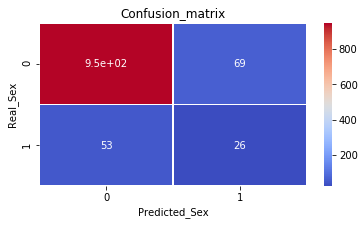


----------Classification Report----------
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1016
           1       0.27      0.33      0.30        79

   micro avg       0.89      0.89      0.89      1095
   macro avg       0.61      0.63      0.62      1095
weighted avg       0.90      0.89      0.89      1095



In [113]:
create_report(DecisionTreeClassifier(random_state=23),X_train,X_test,y_train,y_test)

the accuracy for this model is : 0.9406392694063926
the miss_classification for this model is : 0.0593607305936073
the recall for this model is : 0.31645569620253167
TP 25
TN 1005
FP 11
FN 54


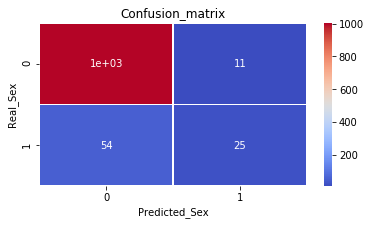


----------Classification Report----------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1016
           1       0.69      0.32      0.43        79

   micro avg       0.94      0.94      0.94      1095
   macro avg       0.82      0.65      0.70      1095
weighted avg       0.93      0.94      0.93      1095



In [103]:
create_report(RandomForestClassifier(n_estimators=100,random_state=23),X_train,X_test,y_train,y_test)

the accuracy for this model is : 0.9333333333333333
the miss_classification for this model is : 0.06666666666666667
the recall for this model is : 0.13924050632911392
TP 11
TN 1011
FP 5
FN 68


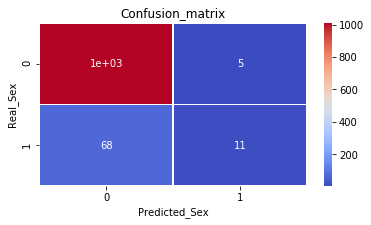


----------Classification Report----------
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1016
           1       0.69      0.14      0.23        79

   micro avg       0.93      0.93      0.93      1095
   macro avg       0.81      0.57      0.60      1095
weighted avg       0.92      0.93      0.91      1095



In [104]:
create_report(GradientBoostingClassifier(random_state=23),X_train,X_test,y_train,y_test)

## The above plots show that the model tends to overfit on males with neglecting the female samples, that is why recall score on 1 (females is low) and we got lower, precision, recall and cosequently f1-scores out of these 3 models.

## Therefore, I will test to reproduce a balanced df_train and again train above algorithms with a balanced data.